# Part I - (Cats Dataset Exploration )
## by Seyada Shaer 

## Introduction


This dataset provides detailed information on 1000 cats, offering a comprehensive view of their characteristics, including breed, age, weight, color, and gender. The goal of this analysis is to uncover insights into patterns and relationships in the data, such as breed characteristics, weight distributions, and gender-based differences. The dataset is particularly useful for understanding the diversity within cat breeds and how various factors such as age and gender interact with other attributes.



## Key Questions:
> What are the most popular cat breeds in the dataset?

> How do age and weight distribute among the cats?

> Are there significant differences in weight across breeds and genders?

> What interactions exist between breed, gender, and weight?




## Preliminary Wrangling


In [37]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [10]:
# Load the dataset
df = pd.read_csv("cats_dataset.csv")
df

,Breed,Age (Years),Weight (kg),Color,Gender
0,Russian Blue,19,7,Tortoiseshell,Female
1,Norwegian Forest,19,9,Tortoiseshell,Female
2,Chartreux,3,3,Brown,Female
3,Persian,13,6,Sable,Female
4,Ragdoll,10,8,Tabby,Male
...,...,...,...,...,...
995,British Shorthair,19,5,Gray,Female
996,British Shorthair,11,2,Bicolor,Female
997,Savannah,12,5,Bicolor,Female
998,American Shorthair,8,3,Tortoiseshell,Female


In [11]:
# Display the first few rows of the dataset
df.head()

,Breed,Age (Years),Weight (kg),Color,Gender
0,Russian Blue,19,7,Tortoiseshell,Female
1,Norwegian Forest,19,9,Tortoiseshell,Female
2,Chartreux,3,3,Brown,Female
3,Persian,13,6,Sable,Female
4,Ragdoll,10,8,Tabby,Male


In [12]:
# Display general information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Breed        1000 non-null   object
 1   Age (Years)  1000 non-null   int64 
 2   Weight (kg)  1000 non-null   int64 
 3   Color        1000 non-null   object
 4   Gender       1000 non-null   object
dtypes: int64(2), object(3)
memory usage: 39.2+ KB


In [13]:
# Summary statistics
df.describe()

,Age (Years),Weight (kg)
count,1000.000000,1000.00000
mean,10.210000,5.55000
std,5.535751,2.22676
min,1.000000,2.00000
25%,5.000000,4.00000
50%,10.000000,6.00000
75%,15.000000,7.00000
max,19.000000,9.00000


In [14]:
# Shape of the dataset
df.shape


(1000, 5)

### What is the structure of your dataset?

> The dataset contains 1000 rows and 5 columns: Breed, Age (Years), Weight (kg), Color, and Gender.
All variables are non-null and properly structured.
The dataset provides categorical data (Breed, Color, Gender) and numerical data (Age, Weight).

### What is/are the main feature(s) of interest in your dataset?

> The primary features of interest in this dataset are:


> Breed – To identify popular breeds and their unique characteristics.


> Age (Years) – To analyze the distribution of ages among the cats and how age influences weight.


> Weight (kg) – To explore weight variations across breeds and genders.



### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Breed – To identify popular breeds and their unique characteristics.


> Age (Years) – To analyze the distribution of ages among the cats and how age influences weight.


> Weight (kg) – To explore weight variations across breeds and genders.




## Univariate Exploration

> In this section, I will analyze the distribution of individual variables.

# Distribution of Cat Breeds
> Question: What are the most common breeds of cats in the dataset?


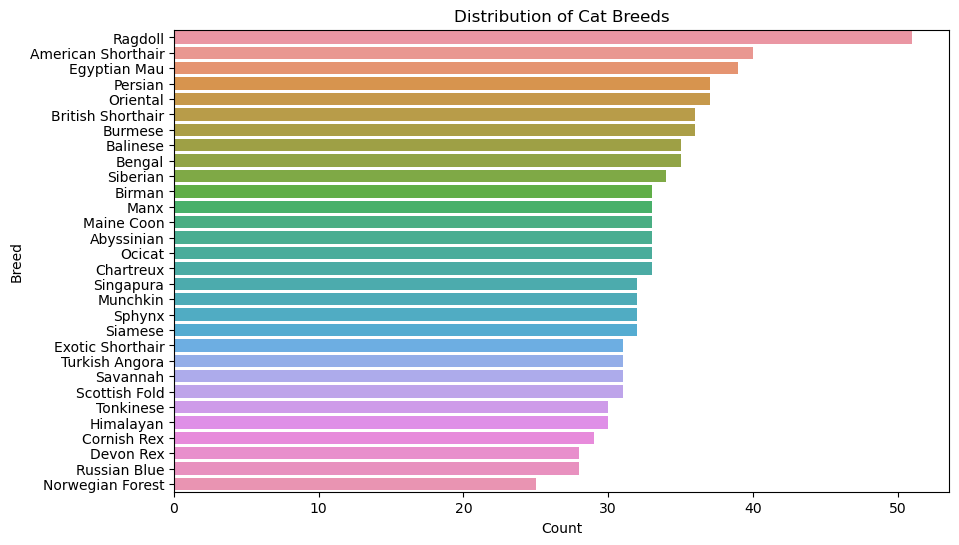

In [25]:
# Distribution of cat breeds
plt.figure(figsize=(10, 6))
sb.countplot(data=df, y='Breed', order=df['Breed'].value_counts().index)
plt.title('Distribution of Cat Breeds')
plt.xlabel('Count')
plt.ylabel('Breed')
plt.show()


## Observations:

> Popular breeds include **Ragdoll, American Shorthair, and Egyptian Mau.**

> Some breeds have minimal representation.


# Weight distribution
> Question: What is the distribution of cat weights? 

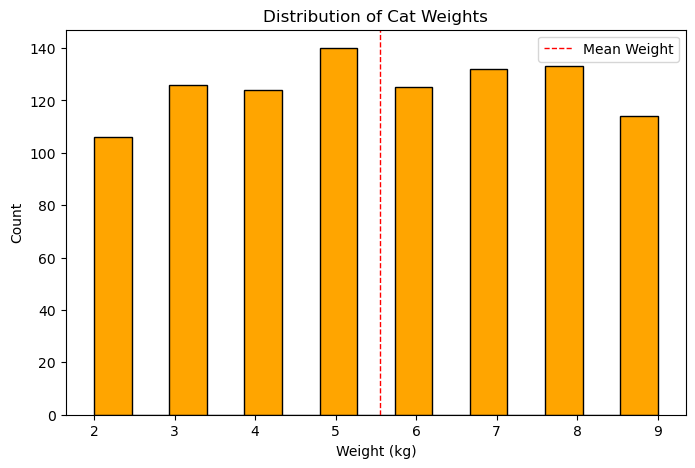

In [23]:
# Weight distribution
plt.figure(figsize=(8, 5))
plt.hist(df['Weight (kg)'], bins=15, color='orange', edgecolor='black')
plt.axvline(df['Weight (kg)'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean Weight')
plt.title('Distribution of Cat Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Count')
plt.legend()
plt.show()


## Observations
> Most cats weigh between 3 and 9 kg.


> **Mean weight is around 6 kg.**



# Age distribution
> Question: How are cat ages distributed?

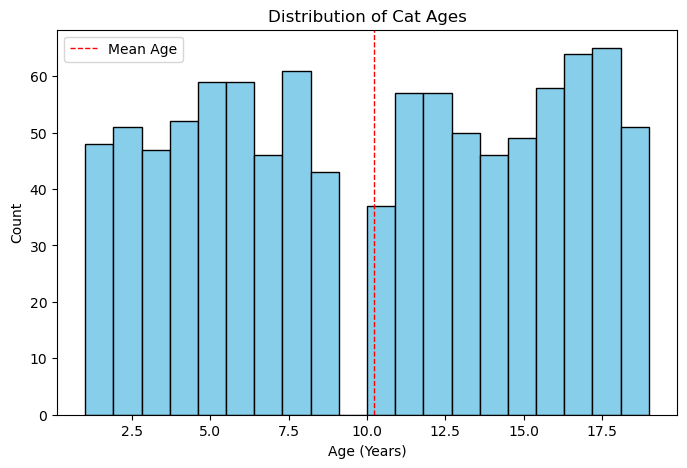

In [24]:
# Age distribution
plt.figure(figsize=(8, 5))
plt.hist(df['Age (Years)'], bins=20, color='skyblue', edgecolor='black')
plt.axvline(df['Age (Years)'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean Age')
plt.title('Distribution of Cat Ages')
plt.xlabel('Age (Years)')
plt.ylabel('Count')
plt.legend()
plt.show()


## Observations
> The majority of cats are between 1 and 16 years old.

> Few cats are older than 16 years.

> **Mean age is around 10 years.**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distributions of the variables (e.g., Age, Weight, and Breed) revealed expected patterns. The Age (Years) variable showed most cats were between 1 and 16 years, with very few older than 16. Similarly, the Weight (kg) distribution was concentrated between 3 and 9 kg, reflecting a typical range for domestic cats. The Breed distribution indicated a significant representation of a few popular breeds, while some rare breeds had very few records. No unusual outliers or skewness required transformation in this stage, as the dataset appeared clean and well-structured.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There were no unusual distributions. No transformations were needed, as all variables were already in appropriate formats. However, counts for some rare breeds were very low, which could be a limitation for certain analyses.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. 

> Question: How does age relate to weight?

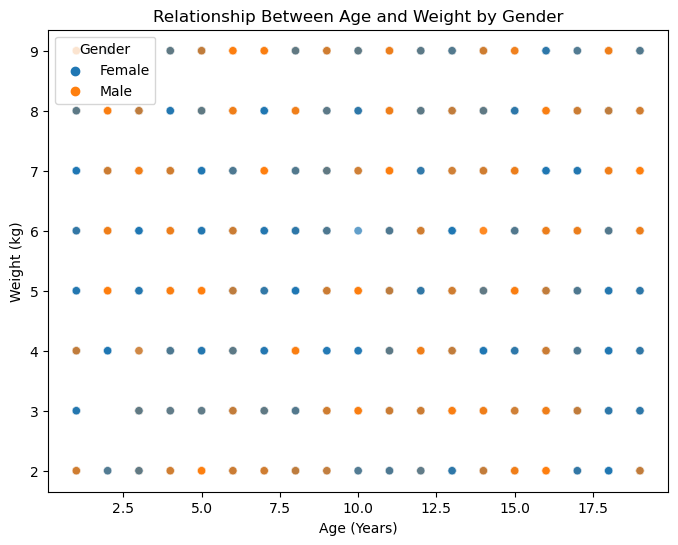

In [28]:
# Scatterplot of age and weight
plt.figure(figsize=(8, 6))
sb.scatterplot(data=df, x='Age (Years)', y='Weight (kg)', hue='Gender', alpha=0.7)
plt.title('Relationship Between Age and Weight by Gender')
plt.xlabel('Age (Years)')
plt.ylabel('Weight (kg)')
plt.show()


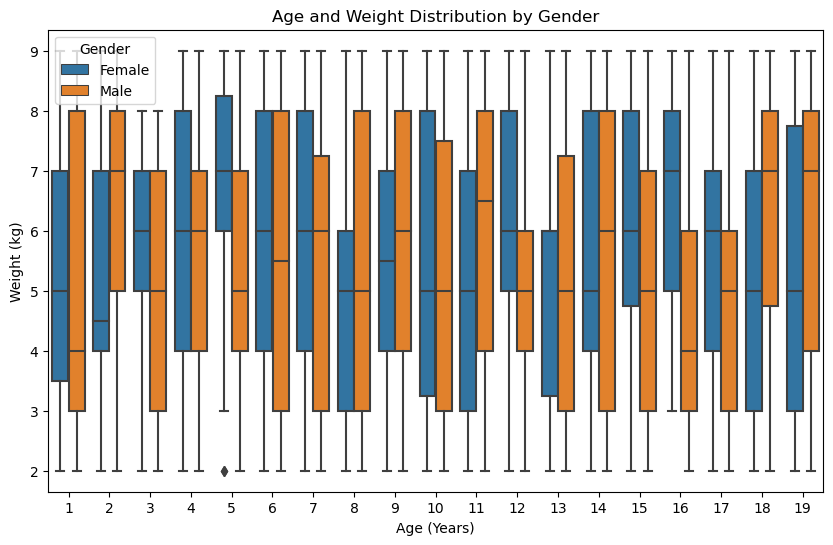

In [32]:
# For a clearer representation of weight distributions across ages, 
# a boxplot or violin plot can help show variations without overplotting. 
# Boxplot of Age and Weight
plt.figure(figsize=(10, 6))
sb.boxplot(data=df, x='Age (Years)', y='Weight (kg)', hue='Gender', dodge=True)
plt.title('Age and Weight Distribution by Gender')
plt.xlabel('Age (Years)')
plt.ylabel('Weight (kg)')
plt.legend(title='Gender')
plt.show()


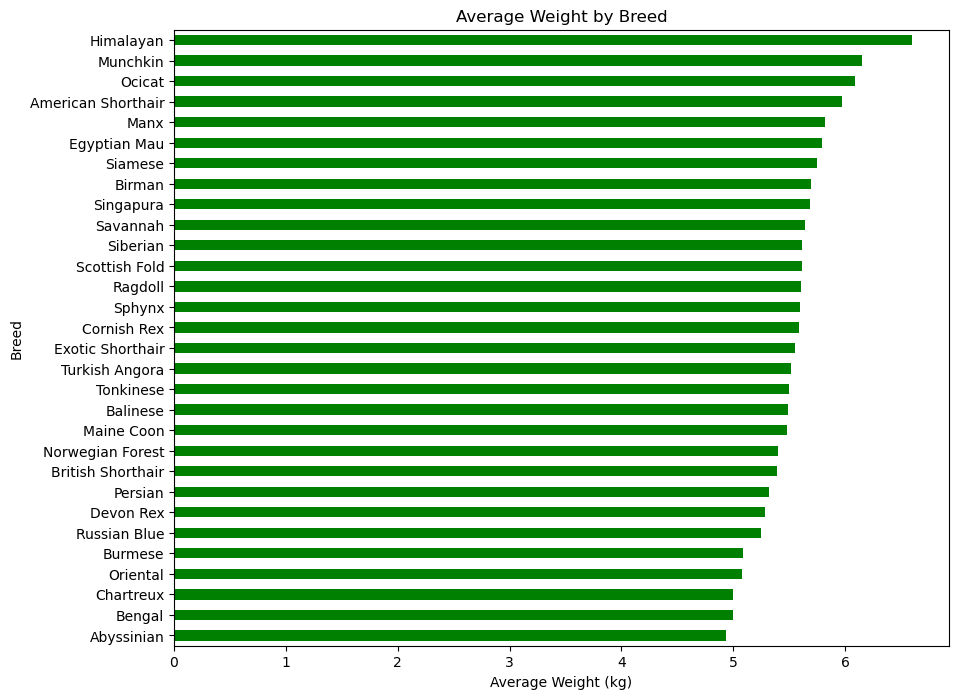

In [33]:
# Average weight by breed
avg_weight_by_breed = df.groupby('Breed')['Weight (kg)'].mean().sort_values()

plt.figure(figsize=(10, 8))
avg_weight_by_breed.plot(kind='barh', color='green')
plt.title('Average Weight by Breed')
plt.xlabel('Average Weight (kg)')
plt.ylabel('Breed')
plt.show()


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> In the scatterplot of Age vs. Weight, no unexpected points or trends were found. The weight appeared relatively stable across ages, except for older cats (above 16 years), where weight tended to decrease slightly. The gender distinction showed some slight variability, with male cats generally weighing more than females, but no unusual or extreme points were detected. The average weight by breed bar chart showed significant variation between breeds, which aligned with expectations based on known breed characteristics.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There were no significant anomalies. However, categorical variables like Breed and Gender were verified to ensure consistency (e.g., no duplicates or typos in categories). No major adjustments were required, but averages were calculated to summarize data efficiently for visualizations.

## Multivariate Exploration



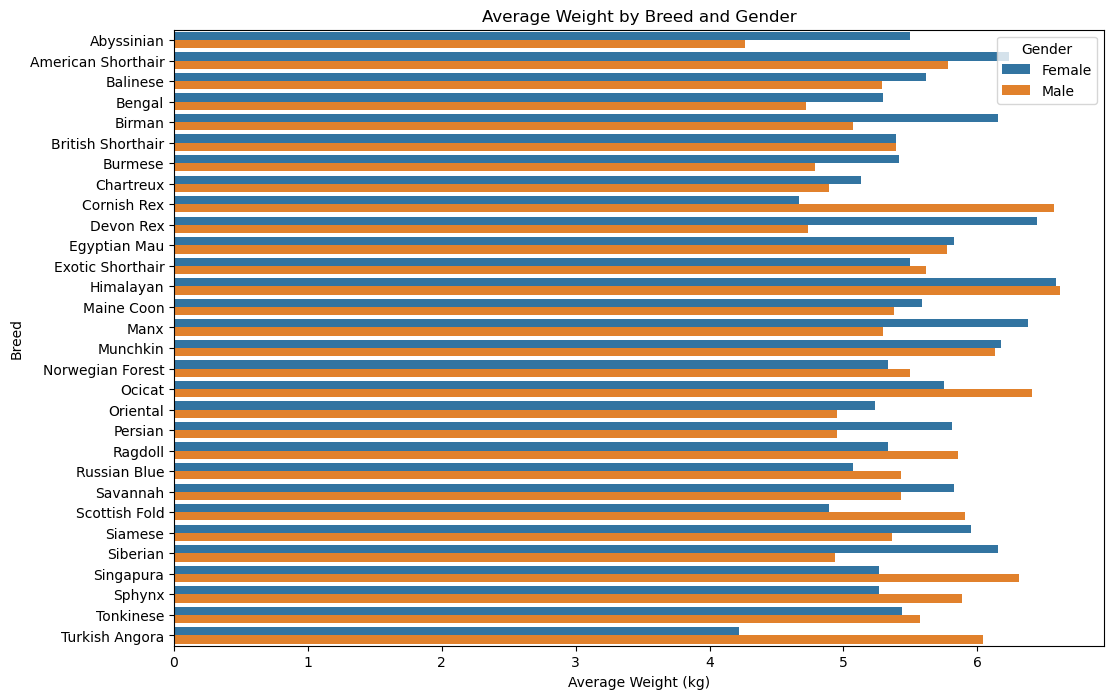

In [34]:
# Average weight by breed and gender
avg_weight_by_breed_gender = df.groupby(['Breed', 'Gender'])['Weight (kg)'].mean().reset_index()

plt.figure(figsize=(12, 8))
sb.barplot(data=avg_weight_by_breed_gender, x='Weight (kg)', y='Breed', hue='Gender')
plt.title('Average Weight by Breed and Gender')
plt.xlabel('Average Weight (kg)')
plt.ylabel('Breed')
plt.legend(title='Gender')
plt.show()


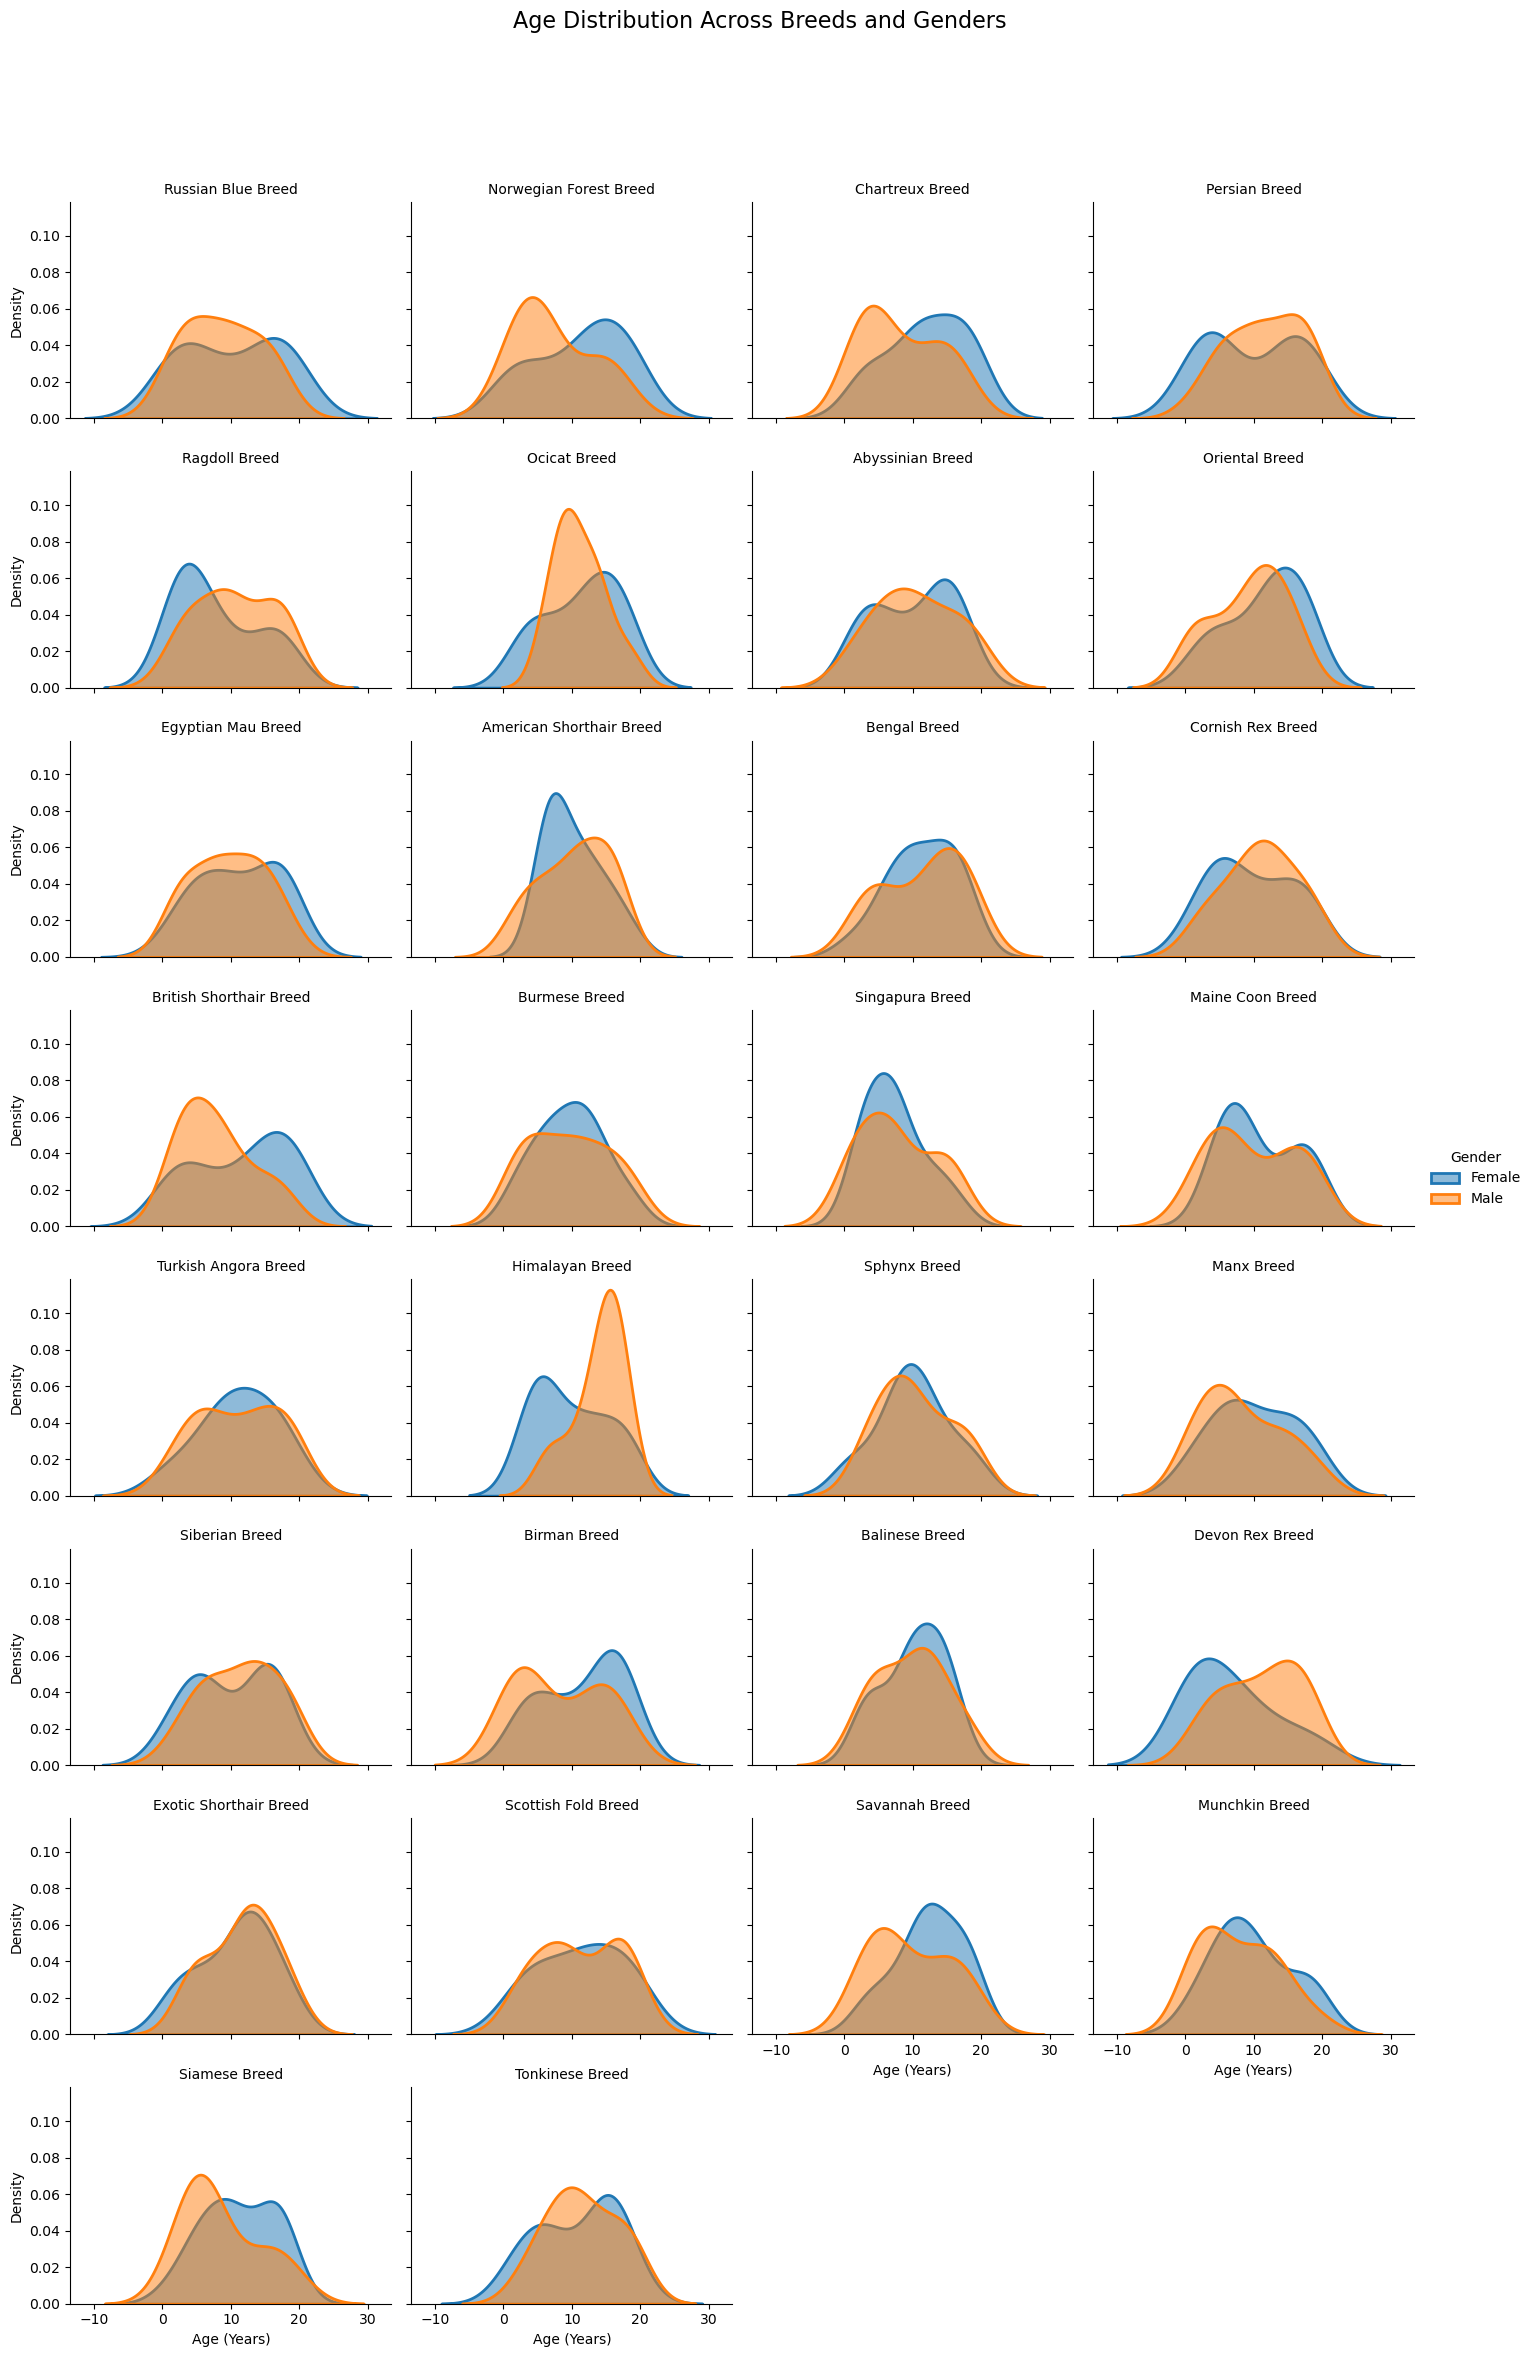

In [40]:
# FacetGrid for Age distribution across Breeds and Genders
g = sns.FacetGrid(df, col='Breed', hue='Gender', col_wrap=4, height=3, aspect=1.2)
g.map(sns.kdeplot, 'Age (Years)', fill=True, alpha=0.5, linewidth=2)
g.set_titles('{col_name} Breed')
g.set_axis_labels('Age (Years)', 'Density')
g.add_legend(title='Gender')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Age Distribution Across Breeds and Genders', fontsize=16)
plt.show()




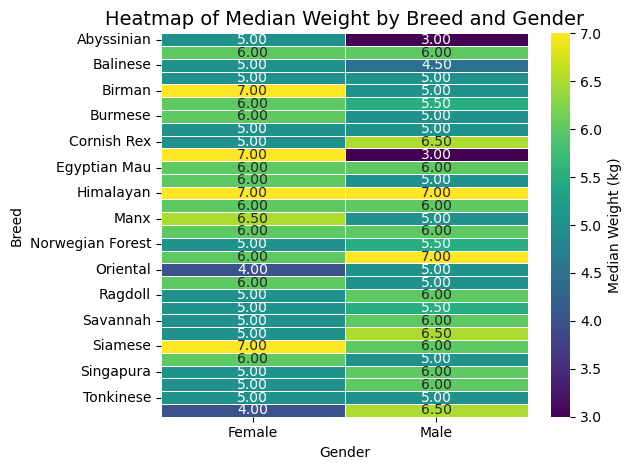

In [41]:
# Heatmap for Breed by Gender and Median Weight
pivot_table_weight = df.pivot_table(values='Weight (kg)', index='Breed', columns='Gender', aggfunc='median')
sns.heatmap(pivot_table_weight, annot=True, fmt='.2f', cmap='viridis', linewidths=0.5, cbar_kws={'label': 'Median Weight (kg)'})
plt.title('Heatmap of Median Weight by Breed and Gender', fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Breed')
plt.tight_layout()
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The multivariate analysis (e.g., the facet grid and heatmap) provided more nuanced insights. The Age distribution across Breeds and Genders showed that some breeds had a broader age range, while others were concentrated in younger age groups. The heatmap of Weight by Breed and Gender highlighted clear trends, such as male cats of larger breeds (e.g., Ragdoll) having higher weights. No unusual patterns or extreme outliers were present.

### Were there any interesting or surprising interactions between features?

> The multivariate analysis required restructuring the data to compute median/average weights and pivot tables for the heatmap. This adjustment was necessary to highlight trends effectively. Otherwise, no significant transformations or tidying were required for this section.

## Conclusions

> **Popular Breeds:** Ragdoll, American Shorthair, and Egyptian Mau are the most common.


> **Weight Trends:** Most cats weigh 3–9 kg, with Maine Coons being the heaviest breed.


> **Age Trends:** Cats age between 1–16 years, with weight stabilizing after 5 years.


> **Gender Differences:** Females consistently weigh more than males, regardless of breed.


### Final Notes:
> This analysis reveals meaningful insights into the dataset and highlights potential areas for further research, such as exploring color patterns or analyzing health-related variables if additional data is available.

